In [88]:
# Dependencies and setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
import matplotlib.dates as mdates
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [89]:
# Load in and read HPI/CPI data
file = '../Resources/US_CpiHpiAvg.csv'

hpi_df = pd.read_csv(file)
hpi_df.head()

,Place Name,Year,Index (SA),Average CPI
0,United States,1991,100.660833,136.191667
1,United States,1992,103.180000,140.316667
2,United States,1993,105.669167,144.458333
3,United States,1994,109.200000,148.225000
4,United States,1995,112.015833,152.383333


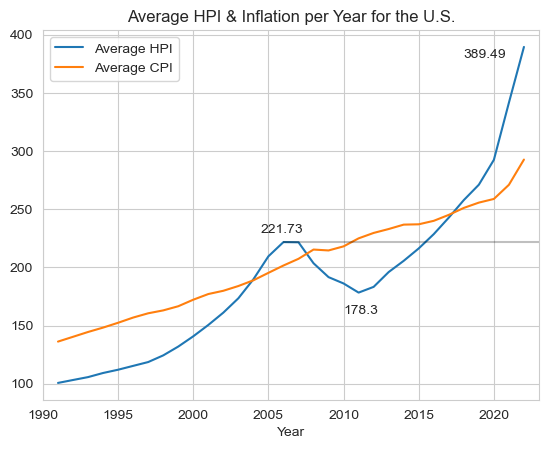

In [90]:
# Line plot for average HPI and CPI for U.S.
index, = plt.plot(hpi_df['Year'], hpi_df['Index (SA)'], label= 'Average HPI')
cpi, = plt.plot(hpi_df['Year'], hpi_df['Average CPI'], label= 'Average CPI')
plt.xlabel('Year')
plt.xlim(1990, 2023)
plt.annotate(round(hpi_df['Index (SA)'][15], 2), (2004.5, 230))
plt.annotate(round(hpi_df['Index (SA)'][20], 2), (2010, 160))
plt.annotate(round(hpi_df['Index (SA)'][31], 2), (2018, 380))
plt.title('Average HPI & Inflation per Year for the U.S.')
plt.hlines(221.73,2006,2023, alpha=0.25, color='black')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("output/output1.png")

plt.show()


## Exploratory Analysis on YOY percent change in both HPI and CPI

In [91]:

# Create new columns detailing percentage change
hpi_df['Index (SA) % Change'] = (hpi_df['Index (SA)'].pct_change())*100
hpi_df['Average CPI % Change'] = (hpi_df['Average CPI'].pct_change())*100

# If the percent change is 0, replace NaN with 0
hpi_df = hpi_df.fillna(0)

hpi_df2 = hpi_df[['Year', 'Index (SA) % Change', 'Average CPI % Change']]

hpi_df2

,Year,Index (SA) % Change,Average CPI % Change
0,1991,0.000000,0.000000
1,1992,2.502628,3.028820
2,1993,2.412451,2.951657
3,1994,3.341404,2.607442
4,1995,2.578602,2.805420
5,1996,2.946756,2.931204
6,1997,2.850845,2.337690
7,1998,4.826981,1.552279
8,1999,6.099400,2.188027
9,2000,6.691936,3.376857


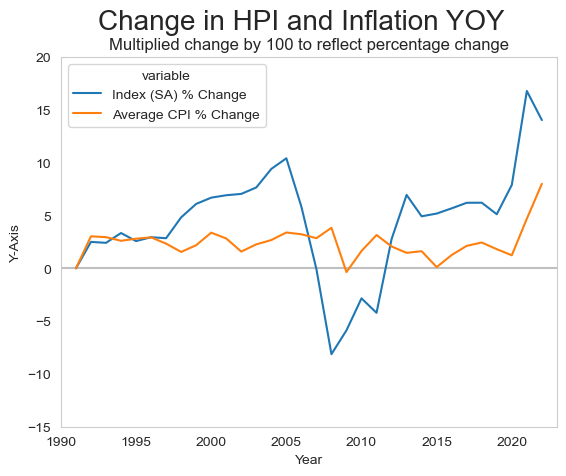

In [92]:

# Plot percent change

fig, ax = plt.subplots()

# Set the x-axis and horizontal line on 0
ax.set(xlabel ='Year', ylabel ='Y-Axis',
       xlim =(1990, 2023), ylim =(-15, 20))
plt.hlines(0,1990,2023, alpha = 0.25, color='black')

# Plot the 2 indexes by year
sns.lineplot(x='Year', y='value', hue='variable', 
             data=pd.melt(hpi_df2, ['Year']))
plt.title('Multiplied change by 100 to reflect percentage change')
plt.suptitle('Change in HPI and Inflation YOY', fontsize = 20)
plt.grid()

# Save the figure
plt.savefig("output/output2.png")

plt.show()

## Now, make line graphs for West South Central region's HPI and CPI
- This matters because most of us are in Austin and belong to this region

In [93]:
# Now, line graph for HPI and CPI for West South Central census division 2019-2022
# Loan in HPI data to include months
hpi_file = '../Resources/clean_monthly_hpi.csv'

us_hpi_monthly = pd.read_csv(hpi_file)

wsc_hpi_monthly = us_hpi_monthly.loc[(us_hpi_monthly['Place Name'] == 'West South Central Division') & 
                                     (us_hpi_monthly['Year'] >= 2018), :]

# Merge columns just to be able to plot the x axis in chronological order
wsc_hpi_monthly['Year & Month'] = wsc_hpi_monthly['Year'].astype(str) + ' - ' + wsc_hpi_monthly['Period'].astype(str)

wsc_hpi_monthly.head()

/Users/emilyneaville/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Place Name,Year,Period,Index (SA),Year & Month
3388,West South Central Division,2018,1,264.42,2018 - 1
3389,West South Central Division,2018,2,268.69,2018 - 2
3390,West South Central Division,2018,3,267.71,2018 - 3
3391,West South Central Division,2018,4,269.00,2018 - 4
3392,West South Central Division,2018,5,269.42,2018 - 5


In [94]:
# Load in West South Central CPI data
wsc_cpi_file = '../Resources/wsc_CPI.csv'

wsc_cpi = pd.read_csv(wsc_cpi_file)

# Filter out preliminary month AND first and second half rows
wsc_cpi = wsc_cpi.loc[(wsc_cpi['Period'] != 'M13') & 
                      (wsc_cpi['Period'] != 'S01') & 
                      (wsc_cpi['Period'] != 'S02')]

# Rename Value to CPI Value
wsc_cpi = wsc_cpi.rename(columns={'Value': 'CPI Value'})

# Delete last row to be consistent with HPI data timeframe (no 12th month in 2022 for HPI dataset)
wsc_cpi = wsc_cpi.drop([71])

wsc_cpi = wsc_cpi[['Year', 'Period', 'CPI Value']]
wsc_cpi.head()

,Year,Period,CPI Value
0,2018,M01,239.772
1,2018,M02,241.123
2,2018,M03,241.595
3,2018,M04,242.486
4,2018,M05,243.279


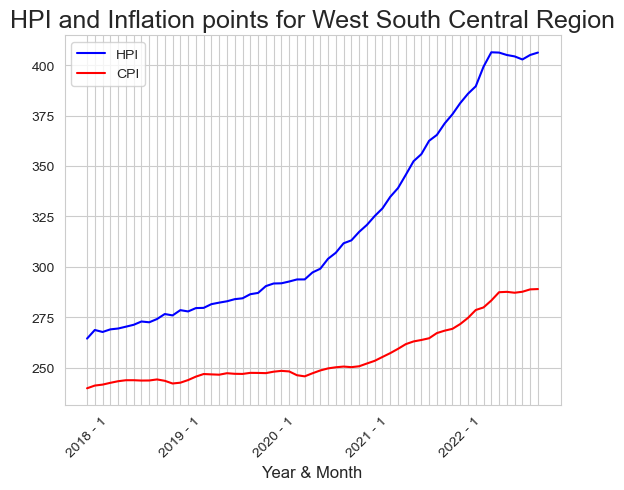

In [95]:
# Set x axis and variables
x_axis = wsc_hpi_monthly['Year & Month']
hpi_line = wsc_hpi_monthly['Index (SA)']
cpi_line = wsc_cpi['CPI Value']

fig, ax = plt.subplots()
ax.tick_params(axis='x', rotation=45)

hpi_handle, = plt.plot(x_axis, hpi_line, color='blue', label="HPI")
cpi_handle, = plt.plot(x_axis, cpi_line, color='red', label="CPI")

# Loop through to hide months 2-12 from the x-axis
every_nth = 12
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

plt.legend(handles = [hpi_handle, cpi_handle])
plt.xlabel('Year & Month', fontsize= 12)
plt.title('HPI and Inflation points for West South Central Region', fontsize= 18)

plt.show()

In [96]:
wsc_hpi_monthly = us_hpi_monthly.loc[(us_hpi_monthly['Place Name'] == 'West South Central Division') & 
                                     (us_hpi_monthly['Year'] >= 2018), :]

# Merge columns
wsc_hpi_monthly['Year & Month'] = wsc_hpi_monthly['Year'].astype(str) + ' & ' + wsc_hpi_monthly['Period'].astype(str)
wsc_hpi_monthly.rename(columns={'Index (SA)':'WSC Index'}, inplace=True)

wsc_hpi_monthly.head()

/Users/emilyneaville/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/emilyneaville/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Place Name,Year,Period,WSC Index,Year & Month
3388,West South Central Division,2018,1,264.42,2018 & 1
3389,West South Central Division,2018,2,268.69,2018 & 2
3390,West South Central Division,2018,3,267.71,2018 & 3
3391,West South Central Division,2018,4,269.00,2018 & 4
3392,West South Central Division,2018,5,269.42,2018 & 5


## Pacific Divison

In [97]:
hpi_file = '../Resources/clean_monthly_hpi.csv'

us_hpi_monthly = pd.read_csv(hpi_file)

pcf_hpi_monthly = us_hpi_monthly.loc[(us_hpi_monthly['Place Name'] == 'Pacific Division') & 
                                     (us_hpi_monthly['Year'] >= 2018), :]

# Merge columns
pcf_hpi_monthly['Year & Month'] = pcf_hpi_monthly['Year'].astype(str) + ' & ' + pcf_hpi_monthly['Period'].astype(str)
pcf_hpi_monthly.rename(columns={'Index (SA)':'PAC Index'}, inplace=True)

pcf_hpi_monthly.head()

/Users/emilyneaville/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
/Users/emilyneaville/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Place Name,Year,Period,PAC Index,Year & Month
2239,Pacific Division,2018,1,293.87,2018 & 1
2240,Pacific Division,2018,2,297.28,2018 & 2
2241,Pacific Division,2018,3,297.10,2018 & 3
2242,Pacific Division,2018,4,298.05,2018 & 4
2243,Pacific Division,2018,5,298.67,2018 & 5


In [98]:
wsc_vs_pcf_df = pd.merge(wsc_hpi_monthly, pcf_hpi_monthly, on=['Year', 'Period', 'Year & Month'], how='inner')
wsc_vs_pcf_df.rename(columns={'Place Name_x':'Region A',
                              'Place Name_y':'Region B'}, inplace=True)
# notating the index statistical summery for each region during 2018 / 2022
wsc_vs_pcf_df.describe()


,Year,Period,WSC Index,PAC Index
count,59.000000,59.000000,59.000000,59.000000
mean,2019.966102,6.406780,319.171864,360.720339
std,1.413800,3.434704,48.076452,57.905268
min,2018.000000,1.000000,264.420000,293.870000
25%,2019.000000,3.500000,279.605000,309.995000
50%,2020.000000,6.000000,297.240000,332.440000
75%,2021.000000,9.000000,359.220000,417.185000
max,2022.000000,12.000000,406.440000,460.200000


In [99]:
# fit a linear regression model to Region A HPI data
reg_a = LinearRegression()
reg_a.fit(wsc_vs_pcf_df[['Year']], wsc_vs_pcf_df['WSC Index'])

# predict Region A HPI for future years
future_years = [2022, 2023, 2024]
reg_a_predictions = reg_a.predict(pd.DataFrame(future_years, columns=['Year']))

# fit a linear regression model to Region B HPI data
reg_b = LinearRegression()
reg_b.fit(wsc_vs_pcf_df[['Year']], wsc_vs_pcf_df['PAC Index'])

# predict Region B HPI for future years
reg_b_predictions = reg_b.predict(pd.DataFrame(future_years, columns=['Year']))


## Index growth predictions for WSC and PAC division

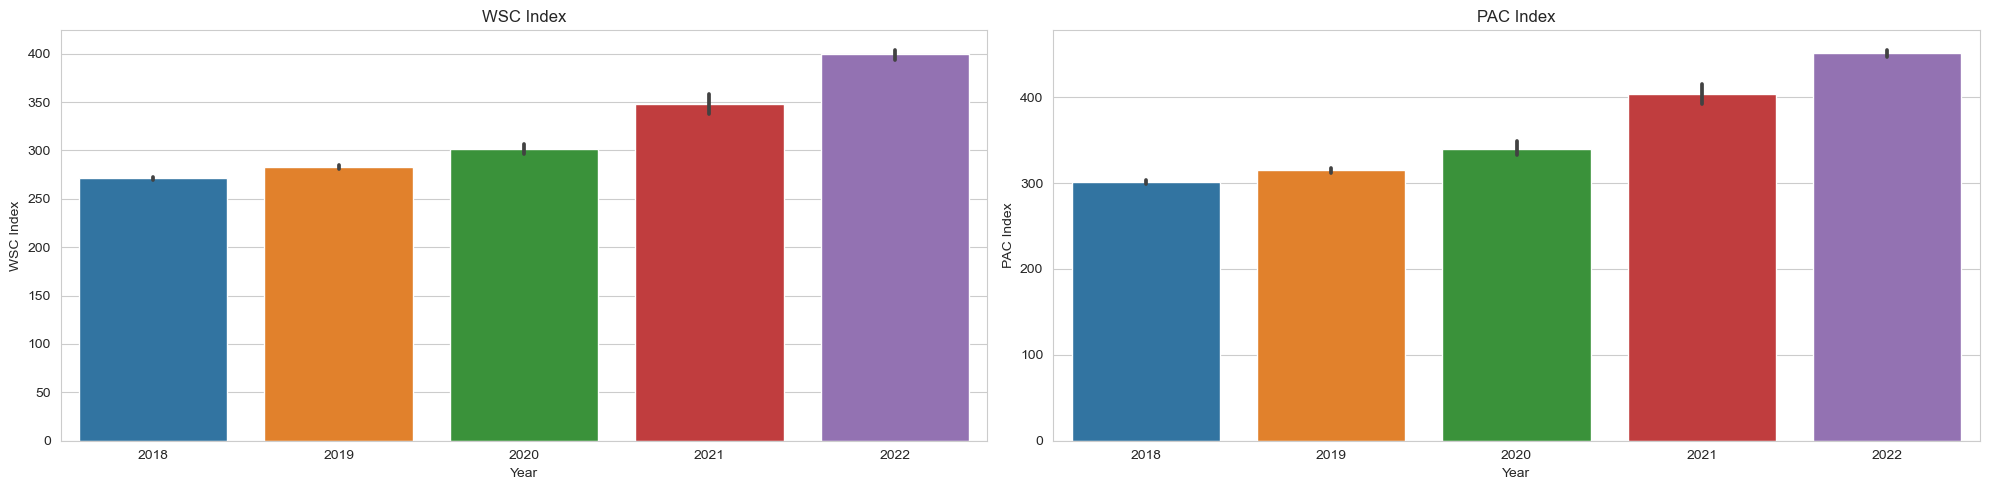

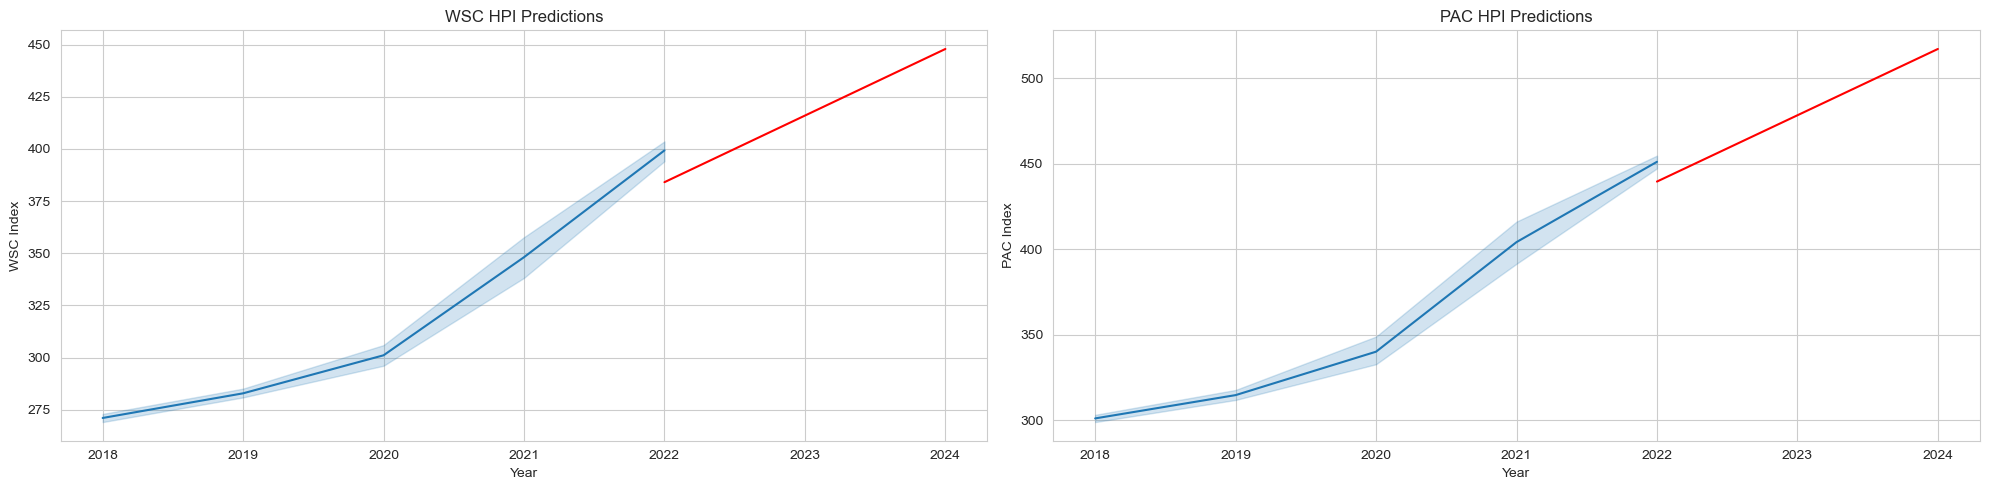

In [100]:
# plot the HPI data for each region
sns.set_style("whitegrid")

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.barplot(x='Year', y='WSC Index', data=wsc_vs_pcf_df, ax=axs[0])
axs[0].set_title('WSC Index')

sns.barplot(x='Year', y='PAC Index', data=wsc_vs_pcf_df, ax=axs[1])
axs[1].set_title('PAC Index')

plt.tight_layout()

# Save the figure
plt.savefig("output/output3.png")

plt.show()

# plot the HPI predictions for each region
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.lineplot(x='Year', y='WSC Index', data=wsc_vs_pcf_df, ax=axs[0])
sns.lineplot(x=future_years, y=reg_a_predictions, color='r', ax=axs[0])
axs[0].set_title('WSC HPI Predictions')

sns.lineplot(x='Year', y='PAC Index', data=wsc_vs_pcf_df, ax=axs[1])
sns.lineplot(x=future_years, y=reg_b_predictions, color='r', ax=axs[1])
axs[1].set_title('PAC HPI Predictions')

plt.tight_layout()

# Save the figure
plt.savefig("output/output4.png")

plt.show()

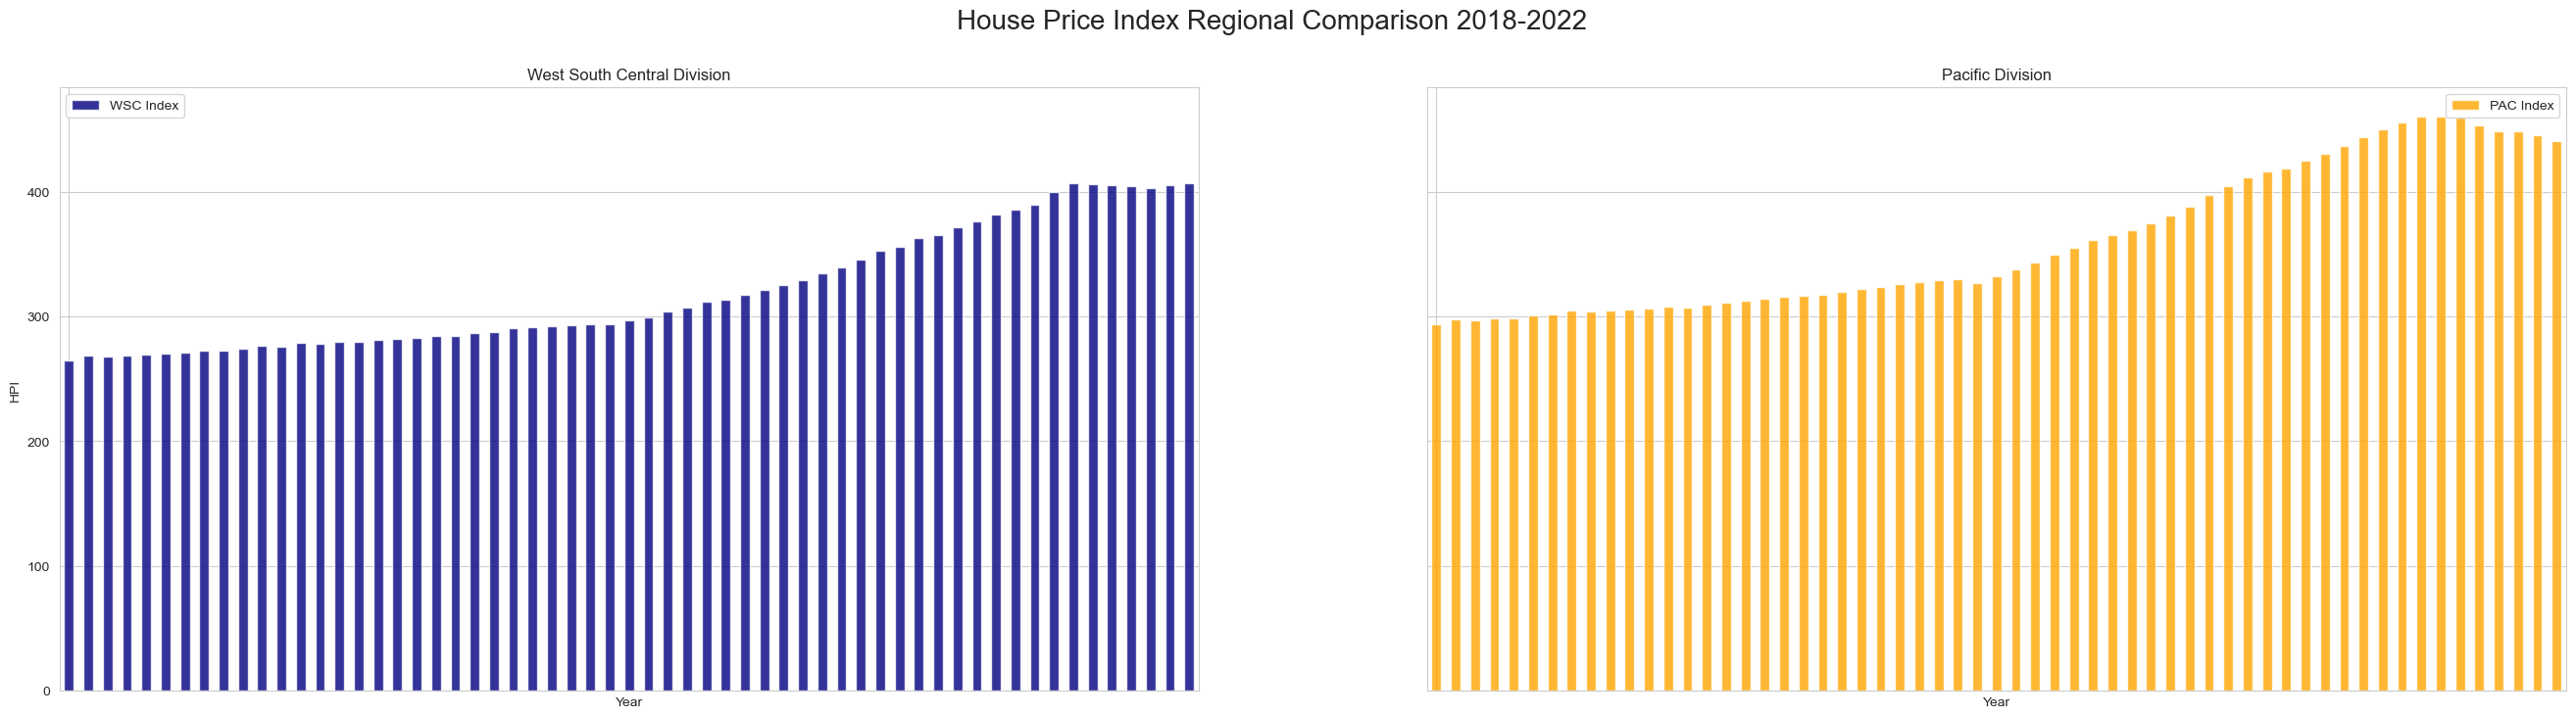

In [101]:
# create a subplot with two columns
fig, axs = plt.subplots(1, 2, figsize=(33, 8), sharey=True)

# create a bar graph for Region A
wsc_vs_pcf_df.plot.bar(x='Year', y='WSC Index', ax=axs[0], legend=True, color='navy', alpha=0.8)
axs[0].set_title('West South Central Division')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('HPI')
# create a bar graph for Region B HPI
wsc_vs_pcf_df.plot.bar(x='Year', y='PAC Index', ax=axs[1], legend=True, color='orange', alpha=0.8)
axs[1].set_title('Pacific Division')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('HPI')

# locate legend to the upper left
axs[0].legend(loc='upper left')

# set the x-tick locator and formatter for each subplot
locator = mdates.YearLocator(base=1, month=1, day=1)
formatter = mdates.DateFormatter('%Y')

for ax in axs:
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    
    # show only every 12th x tick label
    for label in ax.xaxis.get_ticklabels()[::12]:
        label.set_visible(True)
    for label in ax.xaxis.get_ticklabels()[1::12]:
        label.set_visible(False)

# rotate the tick labels to prevent overlapping
plt.setp(axs[0].get_xticklabels(), rotation=90, ha='right')
plt.setp(axs[1].get_xticklabels(), rotation=90, ha='right')

# add a title to the figure
fig.suptitle('House Price Index Regional Comparison 2018-2022', fontsize= 20)
plt.show()


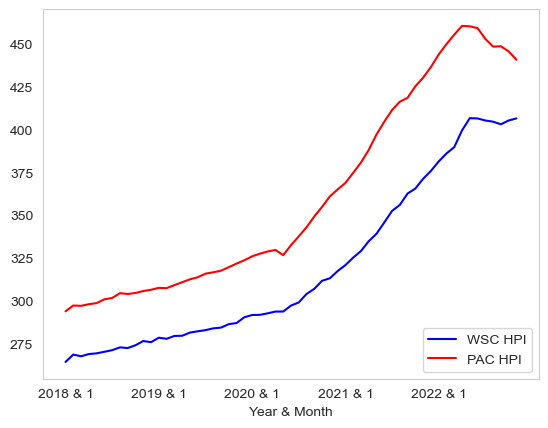

In [102]:
# Set x axis and variables
x_axis = wsc_vs_pcf_df['Year & Month']
wsc_hpi = wsc_hpi_monthly['WSC Index']
pcf_hpi = pcf_hpi_monthly['PAC Index']

fig, ax = plt.subplots()

wsc_hpi_handle, = plt.plot(x_axis, wsc_hpi, color='blue', label="WSC HPI")
pcf_hpi_handle, = plt.plot(x_axis, pcf_hpi, color='red', label="PAC HPI")

every_nth = 12
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

plt.legend(handles = [wsc_hpi_handle, pcf_hpi_handle], loc="lower right")
plt.xlabel('Year & Month')
plt.grid(False)
plt.show()

/Users/emilyneaville/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


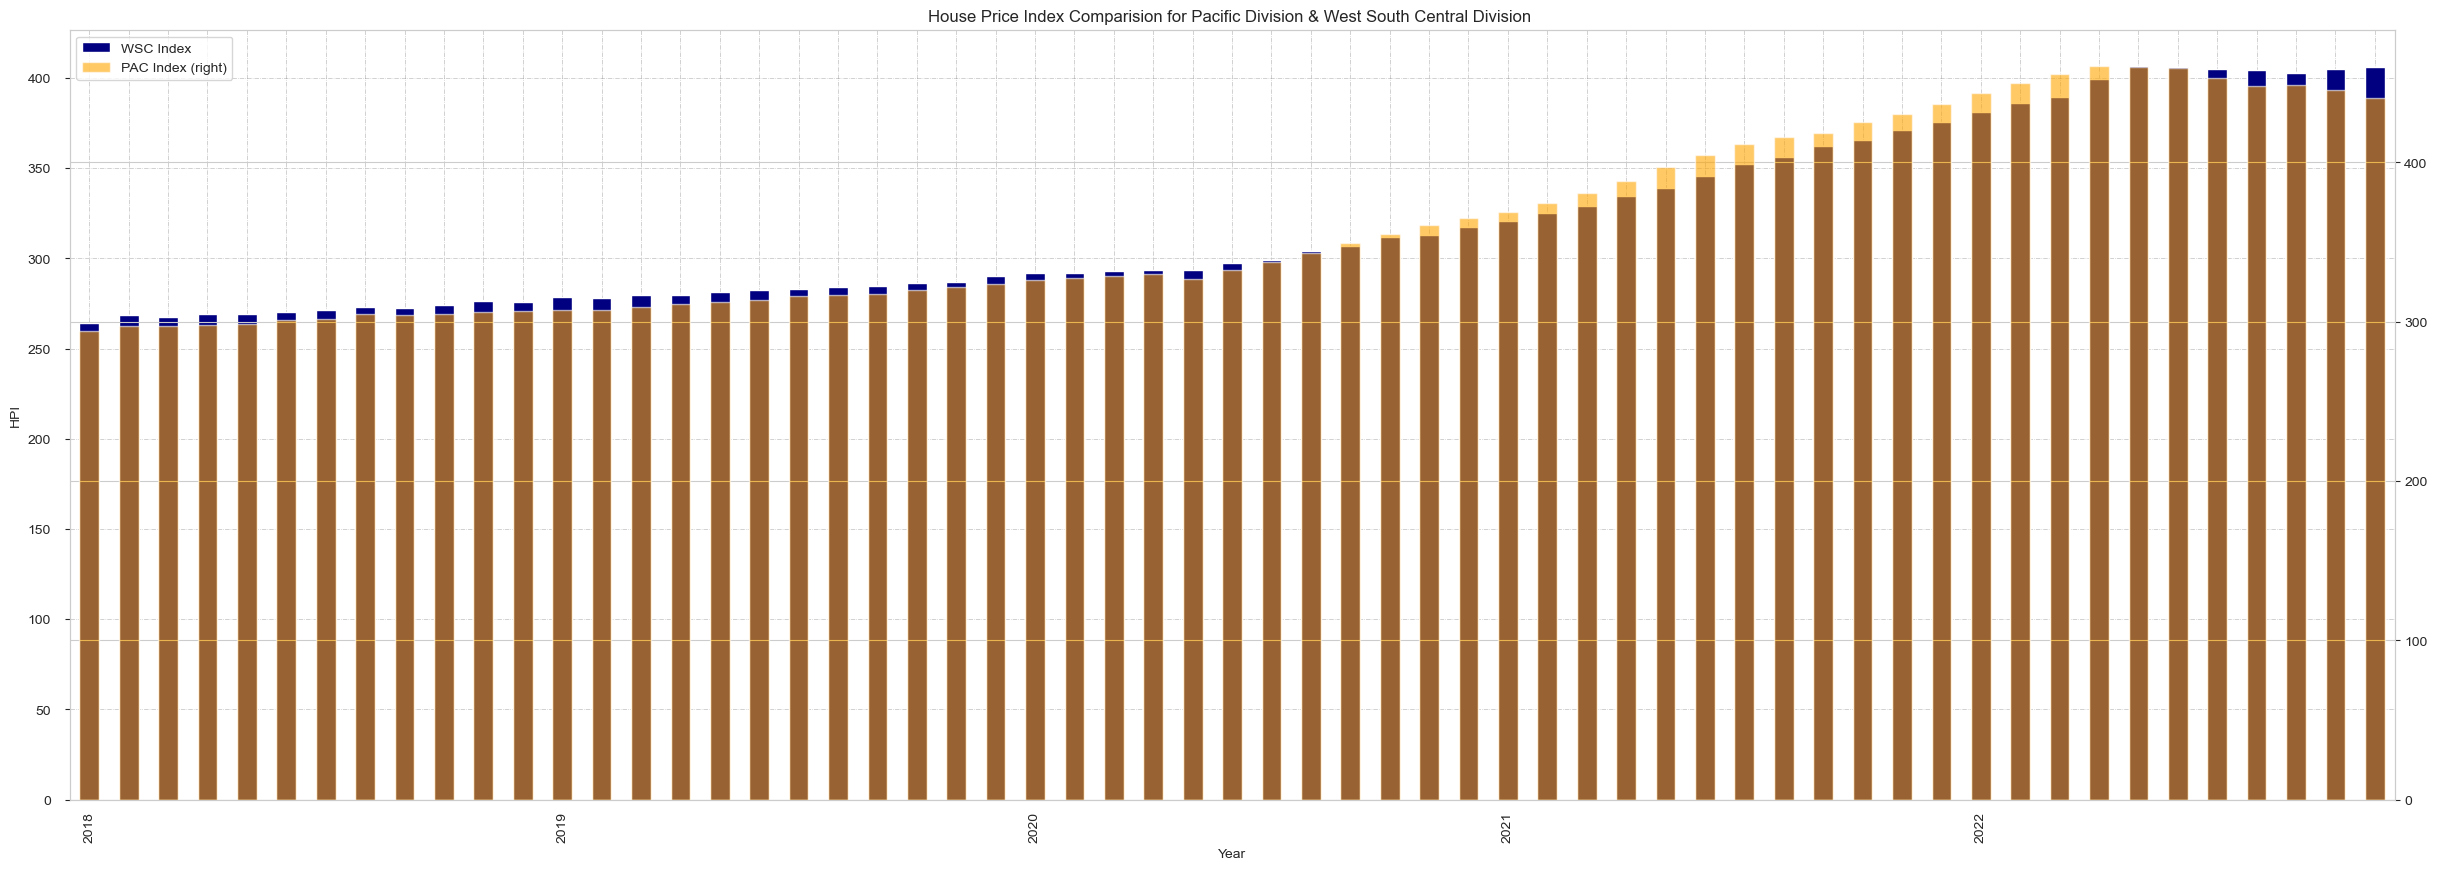

In [103]:

ax = wsc_vs_pcf_df.plot.bar(x='Year', y='WSC Index', color='navy', figsize=(30, 10))
wsc_vs_pcf_df.plot.bar(x='Year', y='PAC Index', ax=ax, color='orange', alpha=0.6, legend=True, secondary_y=True)
ax.set_title('House Price Index Comparision for Pacific Division & West South Central Division ')
ax.set_xlabel('Year')
ax.set_ylabel('HPI')
# only show each year once 
every_nth = 12
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.5)
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
     
plt.show()

## HPI line plot from 2017 to 2019


In [104]:
# 2017 to 2019 HPI only

us_hpi_monthly2 = us_hpi_monthly.loc[(us_hpi_monthly['Place Name'] == 'United States') & 
                                     (us_hpi_monthly['Year'] >= 2017) &
                                     (us_hpi_monthly['Year'] <= 2019), :]

# Merge columns just to be able to plot the x axis in chronological order
us_hpi_monthly2['Year & Month2'] = us_hpi_monthly2['Year'].astype(str) + ' & ' + us_hpi_monthly2['Period'].astype(str)

us_hpi_monthly2.head()

/Users/emilyneaville/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Place Name,Year,Period,Index (SA),Year & Month2
3759,United States,2017,1,235.30,2017 & 1
3760,United States,2017,2,236.68,2017 & 2
3761,United States,2017,3,238.15,2017 & 3
3762,United States,2017,4,239.99,2017 & 4
3763,United States,2017,5,241.09,2017 & 5


In [105]:
# convert df column values into array for visualization 
years_and_month = us_hpi_monthly2['Year & Month2'].to_numpy()
america_data = us_hpi_monthly2['Index (SA)'].to_numpy()

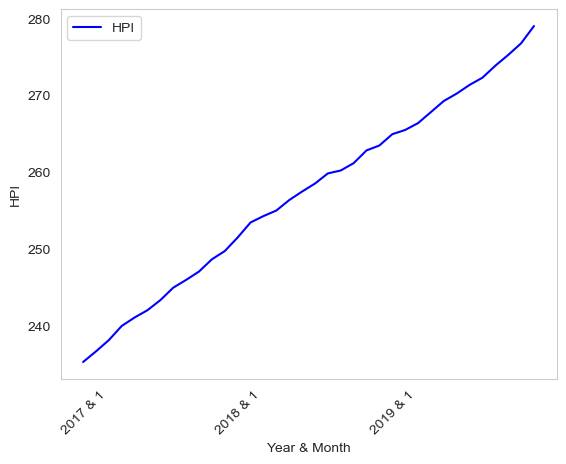

In [106]:
# 2017-2019 pre-covid line graph using matplotlib
# Line plot for 2017-2019 using matplotlib
x_axis = us_hpi_monthly2['Year & Month2']
hpi_data = us_hpi_monthly2['Index (SA)']

fig, ax = plt.subplots()
ax.tick_params(axis='x', rotation=45)

hpi_handle = plt.plot(x_axis, hpi_data, color='blue', label="HPI")

every_nth = 12
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)


ax.legend()
plt.xlabel('Year & Month')
plt.ylabel('HPI')
plt.grid(False)

# Save the figure
plt.savefig("output/output5.png")

plt.show()

## HPI lineplot from 2020 to 2022

In [107]:
# 2020 to 2022 HPI only

us_hpi_monthly3 = us_hpi_monthly.loc[(us_hpi_monthly['Place Name'] == 'United States') & 
                                     (us_hpi_monthly['Year'] >= 2020) &
                                     (us_hpi_monthly['Year'] <= 2022), :]

# Merge columns just to be able to plot the x axis in chronological order
us_hpi_monthly3['Year & Month3'] = us_hpi_monthly3['Year'].astype(str) + ' & ' + us_hpi_monthly3['Period'].astype(str)

us_hpi_monthly3.head()

/Users/emilyneaville/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Place Name,Year,Period,Index (SA),Year & Month3
3795,United States,2020,1,280.76,2020 & 1
3796,United States,2020,2,282.64,2020 & 2
3797,United States,2020,3,283.15,2020 & 3
3798,United States,2020,4,283.82,2020 & 4
3799,United States,2020,5,283.15,2020 & 5


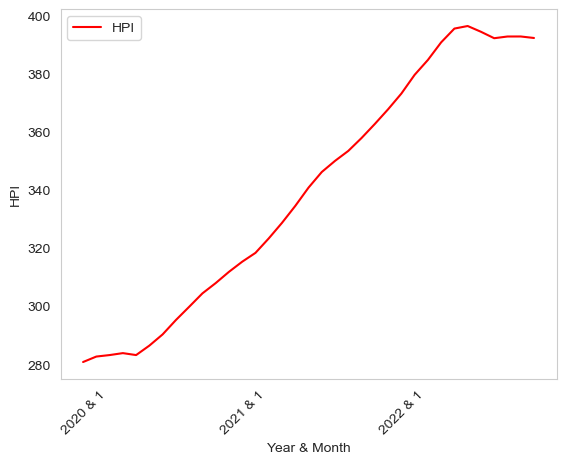

In [108]:

# Line plot for 2020 to 2022 for Index
x_axis = us_hpi_monthly3['Year & Month3']
hpi_data = us_hpi_monthly3['Index (SA)']

fig, ax = plt.subplots()
ax.tick_params(axis='x', rotation=45)

hpi_handle = plt.plot(x_axis, hpi_data, color='red', label="HPI")

every_nth = 12
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

ax.legend()
plt.xlabel('Year & Month')
plt.ylabel('HPI')
plt.grid(False)

# Save the figure
plt.savefig("output/output6.png")

plt.show()

## Now, see how strongly HPI and CPI are correlated

In [109]:
# We want to calculate correlation coefficient
# Reformatted the CPI dataset so that it is in column format with months and years
cpi_file = '../Resources/us_cpi.csv'

us_cpi_monthly = pd.read_csv(cpi_file)

# Filter out first and second half rows
us_cpi_monthly = us_cpi_monthly.loc[(us_cpi_monthly['Period'] != 'S01') & 
                                    (us_cpi_monthly['Period'] != 'S02')]

# Delete last row to be consistent with HPI data timeframe (no 12th month in 2022 for HPI dataset)
us_cpi_monthly = us_cpi_monthly.drop([445])

# Get rid of series ID
monthly_cpi_clean = us_cpi_monthly[['Year', 'Period', 'Value']]

# Rename value to CPI
monthly_cpi_clean = monthly_cpi_clean.rename(columns={'Value': 'CPI'})

monthly_cpi_clean

,Year,Period,CPI
0,1991,M01,134.600
1,1991,M02,134.800
2,1991,M03,135.000
3,1991,M04,135.200
4,1991,M05,135.600
...,...,...,...
440,2022,M07,296.276
441,2022,M08,296.171
442,2022,M09,296.808
443,2022,M10,298.012


In [110]:
# Filter for national data only
us_hpi_monthly = us_hpi_monthly.loc[us_hpi_monthly['Place Name'] == 'United States', :]

us_hpi_monthly = us_hpi_monthly[['Place Name', 'Year', 'Period', 'Index (SA)']]

us_hpi_monthly

,Place Name,Year,Period,Index (SA)
3447,United States,1991,1,100.00
3448,United States,1991,2,100.45
3449,United States,1991,3,100.48
3450,United States,1991,4,100.33
3451,United States,1991,5,100.39
...,...,...,...,...
3825,United States,2022,7,394.40
3826,United States,2022,8,392.18
3827,United States,2022,9,392.77
3828,United States,2022,10,392.78


## Pearson correlation coefficient

In [111]:
# Calculate r and p value
pearson_coef, p_value = stats.pearsonr(us_hpi_monthly['Index (SA)'], monthly_cpi_clean['CPI'])
print(f'HPI and CPI are very strongly correlated with r of {pearson_coef}. P-Value: {p_value}')

HPI and CPI are very strongly correlated with r of 0.931226759860891. P-Value: 4.1842127879844044e-169


## Lastly, Linear Regression

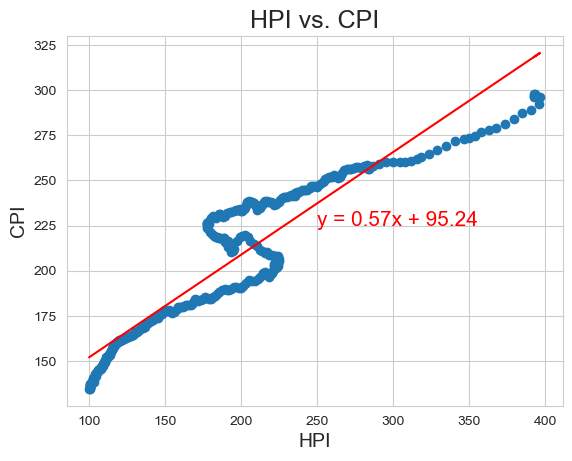

In [112]:
# Linear regression
x_values = us_hpi_monthly['Index (SA)']
y_values = monthly_cpi_clean['CPI']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(250,225),fontsize=15,color="red")
plt.xlabel('HPI', fontsize= 14)
plt.ylabel('CPI', fontsize= 14)
plt.title('HPI vs. CPI', fontsize=18)

# Save the figure
plt.savefig("output/output7.png")

plt.show()